## Use Machine Learning to detect conditions with measurements of anonymous characteristics

The goal of this competition is to predict if a person has any of three medical conditions. You are being asked to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0). You will create a model trained on measurements of health characteristics. 

**- InVitro Cell Research**



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [14]:
df.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [17]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [19]:
df.duplicated().sum()

0

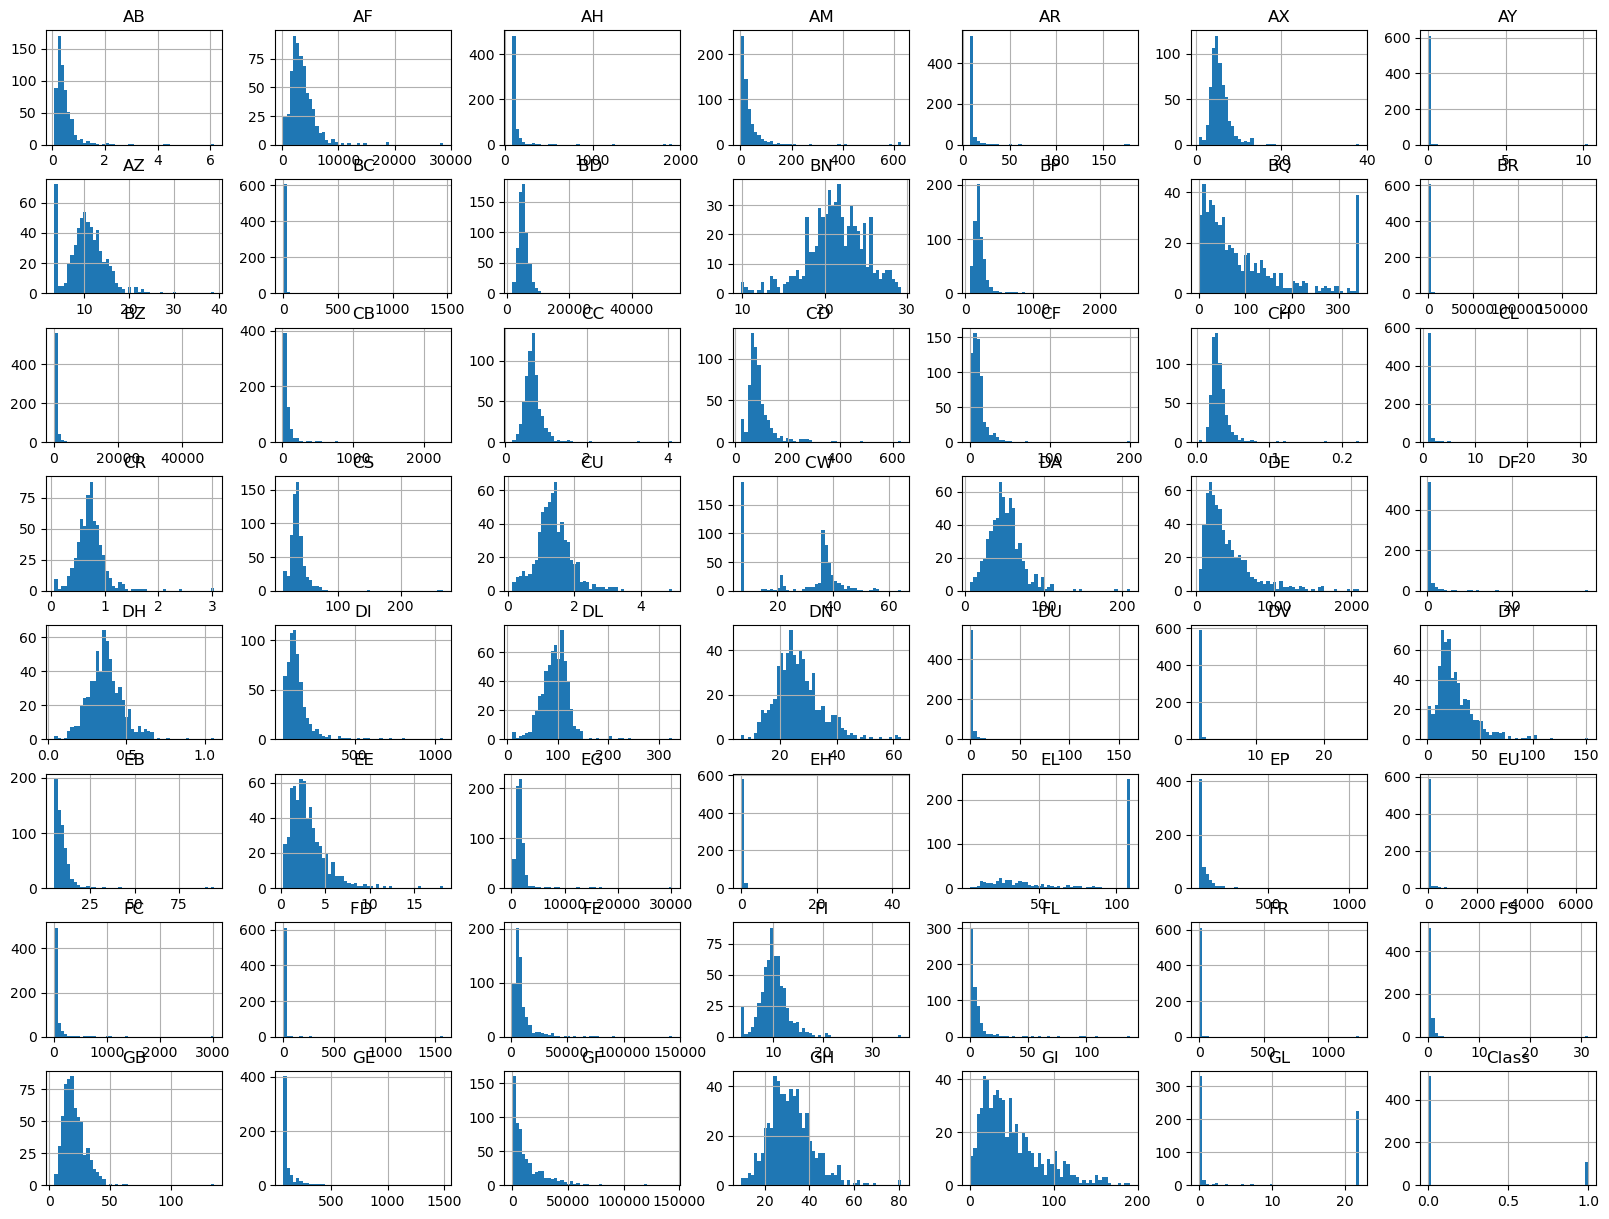

In [28]:
df.hist(figsize=(20,15), bins=50)
plt.show()

In [40]:
# checking for outliers
from scipy import stats
df_z = df.drop(["Id", "EJ", "Class"], axis=1)
z = np.abs(stats.zscore(df_z))
print(z)

           AB        AF        AH        AM        AR        AX        AY  \
0    0.572153  0.170975  0.261669  0.237889  0.189295  1.900558  0.083417   
1    0.709105  1.097801  0.261669  0.028701  0.189295  0.750457  0.083417   
2    0.015212  0.377169  0.261669  0.094845  0.189295  0.465662  0.083417   
3    0.480851  0.138196  0.012347  0.547477  0.189295  0.729610  0.083417   
4    0.206946  0.100517  0.261669  0.356885  0.189295  0.628845  0.013229   
..        ...       ...       ...       ...       ...       ...       ...   
612  0.699975  0.161828  0.040232  0.422762  0.275215  0.802577  0.040875   
613  0.088253  0.852755  0.261669  0.108831  0.556117  0.170319  0.082686   
614  0.106514  0.453742  0.090140  0.235206  0.011673  0.990330  0.083417   
615  0.243466  0.973904  0.261669  0.219353  0.189295  0.955584  0.083417   
616  0.012178  0.360885  3.350987  1.048310  0.189295  0.920714  0.135921   

           AZ        BC       BD   ...        FI  FL        FR  FS        G

In [55]:
# maintaining a threshold to check for outliers
threshold = 3 
np.where(z > 3)

(array([  3,   5,  10,  10,  10,  10,  10,  10,  13,  14,  15,  19,  20,
         23,  26,  29,  32,  32,  33,  33,  34,  36,  45,  52,  52,  52,
         52,  52,  52,  52,  52,  52,  52,  52,  55,  56,  57,  62,  63,
         63,  64,  68,  75,  75,  76,  79,  91, 103, 103, 103, 103, 105,
        107, 109, 109, 113, 113, 115, 116, 116, 118, 118, 119, 127, 130,
        130, 131, 134, 134, 134, 135, 135, 140, 144, 150, 150, 150, 151,
        153, 154, 155, 155, 156, 156, 156, 160, 161, 165, 165, 169, 184,
        184, 184, 187, 189, 194, 194, 194, 194, 201, 203, 204, 205, 207,
        209, 217, 227, 229, 229, 229, 231, 232, 232, 232, 232, 232, 232,
        232, 232, 234, 237, 237, 240, 249, 249, 258, 258, 258, 262, 262,
        263, 265, 271, 278, 279, 280, 284, 291, 292, 293, 295, 301, 302,
        303, 308, 310, 310, 315, 321, 324, 325, 325, 330, 330, 330, 330,
        330, 330, 330, 330, 331, 331, 331, 331, 331, 331, 331, 331, 331,
        331, 331, 335, 336, 336, 337, 337, 338, 344

In [63]:
# another way to check for outliers to confirm 
Q1 = df_z.quantile(0.25)
Q3 = df_z.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AB         0.307656
AF      2164.291910
AH        28.539393
AM        26.869572
AR         0.000000
AX         2.303340
AY         0.011267
AZ         4.839936
BC         3.851344
BD      1880.182830
BN         4.237200
BP        90.956223
BQ       106.174590
BR       550.658617
BZ         0.000000
CB        53.992530
CC         0.208518
CD        35.089328
CF         8.499595
CH         0.010945
CL         0.178220
CR         0.269775
CS        10.746934
CU         0.590319
CW        30.905192
DA        23.466240
DE       319.080510
DF         0.000000
DH         0.131184
DI        63.133402
DL        32.408440
DN         9.655960
DU         1.053172
DV         0.000000
DY        19.342552
EB         4.537656
EE         2.261391
EG       794.540850
EH         0.234234
EL        78.197691
EP        34.239686
EU        44.760696
FC        30.899064
FD         4.583364
FE      5483.285390
FI         2.993559
FL         6.065585
FR         1.015000
FS         0.467337
GB        11.571688


Once we have IQR we can check for outliers. Anything outside the range. 

In [54]:
df_z < (Q1 - 1.5 * IQR)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
614,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df_z > (Q3 + 1.5 * IQR)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
613,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
614,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
615,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
# let's remove the outliers
outlier_df = df_z[((df_z < (Q1 - 1.5 * IQR)) |(df_z > (Q3 + 1.5 * IQR))).any(axis=1)]

In [112]:
outlier_df.shape

(551, 55)

In [115]:
# adding the dropped columns to create a new dataset after modification. We are not adding ID here
outlier_df.insert(1, "EJ", df["EJ"])

In [117]:
outlier_df.insert(1, "Class", df["Class"])

In [118]:
outlier_df

,AB,Class,EJ,AF,AH,AM,AR,AX,AY,AZ,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,1,B,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
2,0.470030,0,B,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,0,B,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,1,B,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
5,0.209377,0,A,2615.81430,85.200147,8.541526,8.138688,4.013127,0.025578,12.547282,...,10.981896,0.173229,0.49706,1.164956,21.915512,72.611063,24177.595550,28.525186,82.527764,21.978000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.149555,0,A,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,0,B,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,0,A,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000
615,0.363205,0,B,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,...,8.026928,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622


In [125]:
outlier_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [126]:
new_df = outlier_df.copy()

In [128]:
new_df.isna().sum()

AB        0
Class     0
EJ        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       52
BR        0
BZ        0
CB        1
CC        2
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EL       52
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
dtype: int64

In [130]:
new_df.dtypes

AB       float64
Class      int64
EJ        object
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
dtype: object

We can skip the exploratory data analysis part as we don't know the meaning of features and it wil be reduntant in a way. Let's look at class distribution

In [147]:
new_df.Class.value_counts()

0    443
1    108
Name: Class, dtype: int64

As we can see we have class imbalance here

In [148]:
new_df.isna().sum()

AB        0
Class     0
EJ        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       52
BR        0
BZ        0
CB        1
CC        2
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EL       52
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
dtype: int64

In [151]:
# let's first get rid of null values from the columns
new_df.fillna({
     
     "BQ": new_df["BQ"].median(),
     "CB": new_df["CB"].median(),
     "CC": new_df["CC"].median(),
     "DU": new_df["DU"].median(),
     "EL": new_df["EL"].median(),
     "FC": new_df["FC"].median(),
     "FL": new_df["FL"].median(),
     "FS": new_df["FS"].median(),
     "GL": new_df["GL"].median(),
 }, inplace = True)

In [152]:
new_df.isna().sum()

AB       0
Class    0
EJ       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
dtype: int64

In [153]:
new_df["EJ"]

0      B
2      B
3      B
4      B
5      A
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 551, dtype: object

In [154]:
from sklearn.preprocessing import LabelEncoder
new_df["EJ"] = LabelEncoder().fit_transform(new_df["EJ"])

In [156]:
new_df["EJ"]

0      1
2      1
3      1
4      1
5      0
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 551, dtype: int64

In [157]:
new_df.shape

(551, 57)

In [159]:
X = new_df.drop(["Class"], axis = 1)
y = new_df["Class"]

In [160]:
X.shape, y.shape

((551, 56), (551,))

Let's create training and validation set first

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [173]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((495, 56), (56, 56), (495,), (56,))

In [187]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

In [205]:
X_modified = StandardScaler().fit_transform(X)

## Training Our Model

### Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight = "balanced")

model1 = log_reg.fit(X_train, y_train)

In [189]:
y_pred_1 = model1.predict(X_val)
y_pred_1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [192]:
score_1 = model1.score(X_val, y_val)
score_1

0.8035714285714286

In [276]:
print(classification_report(y_val, y_pred_1))
roc_auc_score(y_val, y_pred_1)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        49
           1       0.38      0.86      0.52         7

    accuracy                           0.80        56
   macro avg       0.68      0.83      0.70        56
weighted avg       0.90      0.80      0.83        56



0.826530612244898

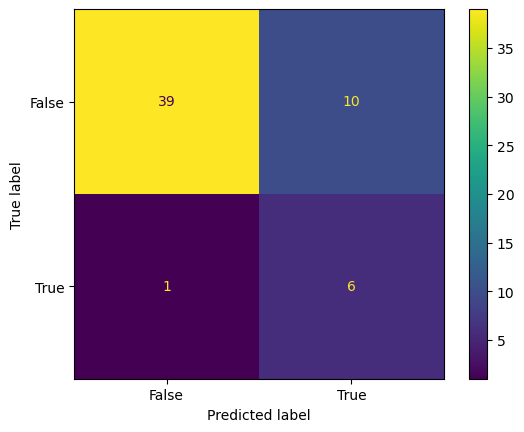

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred_1)
ConfusionMatrixDisplay(cm, display_labels = [False, True]).plot();

#### Cross - val

In [281]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_modified, y, cv = 5, scoring='roc_auc')
scores.mean()

0.8845265179151799

### Support Vector Machine

In [325]:
from sklearn.svm import SVC

svc = SVC(class_weight = "balanced", probability=True)

model2 = svc.fit(X_train, y_train)

In [326]:
y_pred_2 = model2.predict(X_val)
y_pred_2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [327]:
print(classification_report(y_val, y_pred_2))

roc_auc_score(y_val, y_pred_2)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        49
           1       0.40      0.86      0.55         7

    accuracy                           0.82        56
   macro avg       0.69      0.84      0.72        56
weighted avg       0.90      0.82      0.85        56



0.8367346938775511

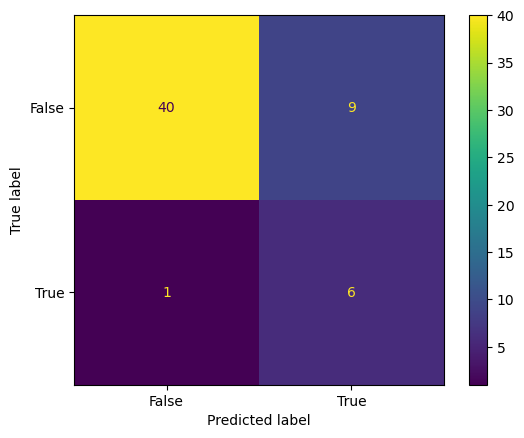

In [328]:
cm_2 = confusion_matrix(y_val, y_pred_2)
ConfusionMatrixDisplay(cm_2, display_labels = [False, True]).plot();

In additon to AUC score it is also performing well.

In [329]:
score_2 = model2.score(X_val, y_val)
score_2

0.8214285714285714

#### Cross Val

In [282]:
scores = cross_val_score(svc, X_modified, y, cv =5, scoring='roc_auc')

In [283]:
scores.mean()

0.9223725287310579

## SGD 

In [220]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(class_weight = "balanced")

model3 = sgd.fit(X_train, y_train)
y_pred_3 = model3.predict(X_val)
y_pred_3

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [221]:
score_3 = model3.score(X_val, y_val)
score_3

0.75

In [278]:
print(classification_report(y_val, y_pred_3))

roc_auc_score(y_val, y_pred_3)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        49
           1       0.40      0.57      0.47         7

    accuracy                           0.84        56
   macro avg       0.67      0.72      0.69        56
weighted avg       0.87      0.84      0.85        56



0.7244897959183673

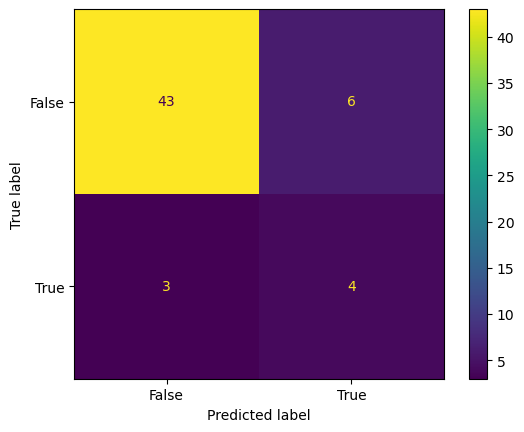

In [303]:
cm_3 = confusion_matrix(y_val, y_pred_3)
ConfusionMatrixDisplay(cm_3, display_labels = [False, True]).plot();

#### Cross Val

In [284]:
scores = cross_val_score(sgd, X_modified, y, cv = 5, scoring='roc_auc')
scores.mean()

0.8601226403831103

### Decision Tree Classifier

In [224]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = "balanced")

model4 = dt.fit(X_train, y_train)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [225]:
y_pred_4 = model4.predict(X_val)
y_pred_4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [279]:
print(classification_report(y_val, y_pred_4))

roc_auc_score(y_val, y_pred_4)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        49
           1       0.40      0.57      0.47         7

    accuracy                           0.84        56
   macro avg       0.67      0.72      0.69        56
weighted avg       0.87      0.84      0.85        56



0.7244897959183673

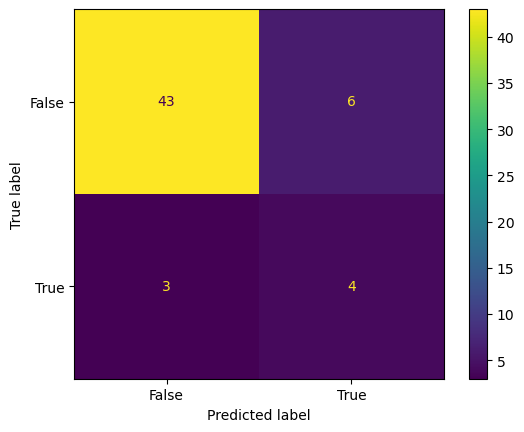

In [305]:
cm_4 = confusion_matrix(y_val, y_pred_4)
ConfusionMatrixDisplay(cm_4, display_labels = [False, True]).plot();

In [227]:
score_4 = model4.score(X_val, y_val)
score_4

0.8392857142857143

## Cross Val

In [285]:
scores = cross_val_score(dt, X_modified, y, cv = 5, scoring='roc_auc')
scores.mean()

0.7478908264020623

### RandomForestClassifier

In [229]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = "balanced")

model5 = rfc.fit(X_train, y_train)

y_pred_5 = model5.predict(X_val)
y_pred_5

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [231]:
score_5 = model5.score(X_val, y_val)
score_5

0.875

In [280]:
print(classification_report(y_val, y_pred_5))

roc_auc_score(y_val, y_pred_5)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.50      0.57      0.53         7

    accuracy                           0.88        56
   macro avg       0.72      0.74      0.73        56
weighted avg       0.88      0.88      0.88        56



0.7448979591836735

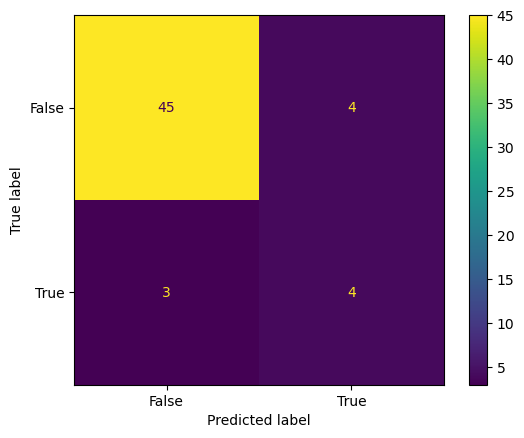

In [306]:
cm_5 = confusion_matrix(y_val, y_pred_5)
ConfusionMatrixDisplay(cm_5, display_labels = [False, True]).plot();

#### Cross Val

In [286]:
scores = cross_val_score(rfc, X_modified, y, cv = 5, scoring='roc_auc')
scores.mean()

0.9525003426944181

### K-Nearest Neighbors 

In [236]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(weights = "uniform")

model6 = knc.fit(X_train, y_train)
y_pred_6 = model6.predict(X_val)
y_pred_6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])

In [237]:
score_6 = model6.score(X_val, y_val)
score_6

0.8571428571428571

Let's check different parameter

In [241]:
train_scores = []
val_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier(weights = 'uniform')

for i in neighbors:
    
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(knn.score(X_val, y_val))


In [244]:
max(val_scores), max(train_scores)

(0.8928571428571429, 1.0)

Max score on validation set is: 0.8929%


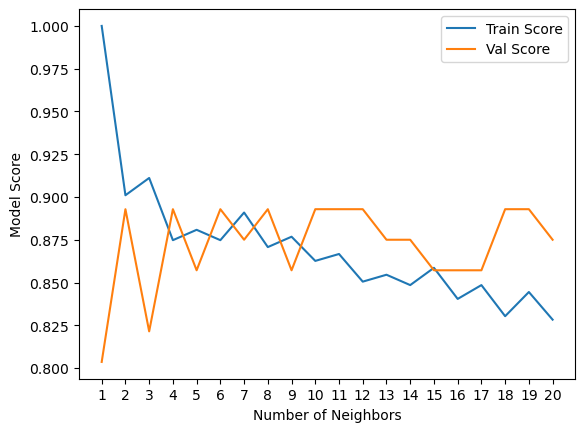

In [246]:
plt.plot(neighbors, train_scores, label ="Train Score")
plt.plot(neighbors, val_scores, label = "Val Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max score on validation set is: {max(val_scores):.4f}%")

In [252]:
# Seems like our ideal neighbors is 8 from the graph. 
knn.set_params(n_neighbors = 8)
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.8928571428571429

In [257]:
y_pred_6_1 = knn.predict(X_val)
y_pred_6_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

This has beaten our RandomForest score

#### Cross Val 

In [287]:
kn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
scores = cross_val_score(kn, X_modified, y, cv = 5, scoring='roc_auc')
scores.mean() 

0.8540977685066039

In [288]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_val, y_pred_6_1))

roc_auc_score(y_val, y_pred_6_1)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.60      0.43      0.50         7

    accuracy                           0.89        56
   macro avg       0.76      0.69      0.72        56
weighted avg       0.88      0.89      0.89        56



0.6938775510204082

Based on the above scores we can see that Support Vector Machine is doing better as compared to others because it has better roc_auc score than others and it also has better prediction rate. We can also further tune the hyperparameter of both the best performing models Logistic regression and SVM 

Let's make the prediction on test set and see it's performance

In [307]:
test_df = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")

In [321]:
test_df.tail()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
test_df.dtypes

Id      object
AB     float64
AF     float64
AH     float64
AM     float64
AR     float64
AX     float64
AY     float64
AZ     float64
BC     float64
BD     float64
BN     float64
BP     float64
BQ     float64
BR     float64
BZ     float64
CB     float64
CC     float64
CD     float64
CF     float64
CH     float64
CL     float64
CR     float64
CS     float64
CU     float64
CW     float64
DA     float64
DE     float64
DF     float64
DH     float64
DI     float64
DL     float64
DN     float64
DU     float64
DV     float64
DY     float64
EB     float64
EE     float64
EG     float64
EH     float64
EJ      object
EL     float64
EP     float64
EU     float64
FC     float64
FD     float64
FE     float64
FI     float64
FL     float64
FR     float64
FS     float64
GB     float64
GE     float64
GF     float64
GH     float64
GI     float64
GL     float64
dtype: object

In [310]:
test_df.isna().sum()

Id     0
AB     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
DE     0
DF     0
DH     0
DI     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
GL     0
dtype: int64

In [311]:
test_df.drop(["Id"], axis = 1, inplace = True)

In [312]:
test_df.shape

(5, 56)

In [313]:
test_df["EJ"] = LabelEncoder().fit_transform(test_df["EJ"])

In [314]:
X_test = StandardScaler().fit_transform(test_df)

In [318]:
X_test.shape

(5, 56)

In [315]:
y_pred_test = model2.predict(X_test)

In [316]:
y_pred_test

array([0, 0, 0, 0, 0])

In [330]:
y_prob = model2.predict_proba(X_test)
y_prob

array([[0.95264517, 0.04735483],
       [0.95264517, 0.04735483],
       [0.95264517, 0.04735483],
       [0.95264517, 0.04735483],
       [0.95264517, 0.04735483]])

In [331]:
test_data = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")
test_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
sample_submission = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")

In [334]:
sample_submission

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [336]:
sample_submission[['class_0', 'class_1']] = y_prob
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)